# Snoring Classification

## 라이브러리 불러오기

In [1]:
import os
import pathlib
import librosa
import librosa.display
import soundfile as sf
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import IPython.display as ipd
import pandas as pd

from tensorflow.keras import layers
from tensorflow.keras import models
from scipy.io import wavfile


2024-09-23 12:58:02.406679: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-23 12:58:02.442426: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-23 12:58:02.442458: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-23 12:58:02.442479: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-23 12:58:02.449804: I tensorflow/core/platform/cpu_feature_g

## 데이터셋 가져오기

In [2]:
cur_path = os.getcwd()
print(cur_path)

train_audio_lists = os.listdir(cur_path + '/SnoringDataset/train/audio_recordings')
train_label_lists = os.listdir(cur_path + '/SnoringDataset/train/audio_labels')

test_audio_lists = os.listdir(cur_path + '/SnoringDataset/test/audio_recordings')
test_label_lists = os.listdir(cur_path + '/SnoringDataset/test/audio_labels')

train_audio_lists = sorted(train_audio_lists, key = lambda x : (len(x), x))
train_label_lists = sorted(train_label_lists, key = lambda x : (len(x), x))

test_audio_lists = sorted(test_audio_lists, key = lambda x : (len(x), x))
test_label_lists = sorted(test_label_lists, key = lambda x : (len(x), x))

print(train_audio_lists)
print(train_label_lists)
print(test_audio_lists)
print(test_label_lists)


/home/geongsang/TensorFlowLab/0B_SnoringAudioRecog
['0_0.wav', '0_1.wav', '0_2.wav', '0_3.wav', '0_4.wav', '0_5.wav', '0_6.wav', '0_7.wav', '0_8.wav', '0_9.wav', '1_0.wav', '1_1.wav', '1_2.wav', '1_3.wav', '1_4.wav', '1_5.wav', '1_6.wav', '1_7.wav', '1_8.wav', '1_9.wav', '0_10.wav', '0_11.wav', '0_12.wav', '0_13.wav', '0_14.wav', '0_15.wav', '0_16.wav', '0_17.wav', '0_18.wav', '0_19.wav', '0_20.wav', '0_21.wav', '0_22.wav', '0_23.wav', '0_24.wav', '0_25.wav', '0_26.wav', '0_27.wav', '0_28.wav', '0_29.wav', '0_30.wav', '0_31.wav', '0_32.wav', '0_33.wav', '0_34.wav', '0_35.wav', '0_36.wav', '0_37.wav', '0_38.wav', '0_39.wav', '0_40.wav', '0_41.wav', '0_42.wav', '0_43.wav', '0_44.wav', '0_45.wav', '0_46.wav', '0_47.wav', '0_48.wav', '0_49.wav', '0_50.wav', '0_51.wav', '0_52.wav', '0_53.wav', '0_54.wav', '0_55.wav', '0_56.wav', '0_57.wav', '0_58.wav', '0_59.wav', '0_60.wav', '0_61.wav', '0_62.wav', '0_63.wav', '0_64.wav', '0_65.wav', '0_66.wav', '0_67.wav', '0_68.wav', '0_69.wav', '0_70.wa

In [3]:
cur_path = os.getcwd()
print(cur_path)
train_audio_path = './SnoringDataset/train/audio_recordings'
train_label_path = './SnoringDataset/train/audio_labels'

train_audio_dict = {}
train_mfcc_list = []
train_label_list = []

scaler = StandardScaler()

for train_audio in train_audio_lists:
    audio, sr = librosa.load(train_audio_path + '/' + train_audio, sr = 16000)
    train_audio_mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=28, hop_length=160) 
    train_audio_mfcc = scaler.fit_transform(train_audio_mfcc.T).T # 정규분포 정규화
    train_mfcc_list.append(train_audio_mfcc)


for train_label in train_label_lists:
    f = open(train_label_path + '/' + train_label)
    label = f.readline()
    train_label_list.append(label)
print(len(train_label_list))

train_audio_dict['mfcc'] = np.array(train_mfcc_list)
train_audio_dict['label'] = np.array(train_label_list)

print(train_audio_dict.keys())
print(train_audio_dict['mfcc'])
print(train_audio_dict['label'])

/home/geongsang/TensorFlowLab/0B_SnoringAudioRecog
700
dict_keys(['mfcc', 'label'])
[[[-2.75531387e+00 -2.54613280e+00 -2.39255524e+00 ... -1.06312193e-01
   -2.25235328e-01 -3.94563913e-01]
  [ 5.79255760e-01  4.76584047e-01  3.71737838e-01 ...  1.91597998e+00
    1.90460610e+00  1.90157771e+00]
  [ 1.93916523e+00  1.99453747e+00  2.07651997e+00 ...  1.09317684e+00
    1.10372329e+00  1.08963346e+00]
  ...
  [-1.03302896e+00 -8.99245262e-01 -7.46819854e-01 ...  1.37464508e-01
    4.97751916e-03 -1.21740416e-01]
  [ 1.42331994e+00  1.36571586e+00  1.30443311e+00 ...  8.71635616e-01
    8.57647657e-01  8.27517509e-01]
  [ 4.02610511e-01  5.53771019e-01  6.87474191e-01 ... -2.35900775e-01
   -1.93611920e-01 -1.67505622e-01]]

 [[-2.65080190e+00 -2.37724972e+00 -2.23333359e+00 ... -3.53711039e-01
   -3.17629218e-01 -5.04301190e-01]
  [ 2.28680634e+00  2.27576780e+00  2.26106572e+00 ...  1.30709007e-01
    2.26509139e-01  2.99331963e-01]
  [ 1.26294398e+00  1.28105152e+00  1.25808418e+00 .

In [4]:
cur_path = os.getcwd()
print(cur_path)
test_audio_path = './SnoringDataset/test/audio_recordings'
test_label_path = './SnoringDataset/test/audio_labels'

test_audio_dict = {}
test_mfcc_list = []
test_label_list = []

for test_audio in test_audio_lists:
    audio, sr = librosa.load(test_audio_path + '/' + test_audio, sr = 16000)
    test_audio_mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=28, hop_length=160)
    test_audio_mfcc = scaler.fit_transform(test_audio_mfcc.T).T # 정규분포 정규화
    test_mfcc_list.append(test_audio_mfcc)

for test_label in test_label_lists:
    f = open(test_label_path + '/' + test_label)
    label = f.readline()
    test_label_list.append(label)
print(len(test_label_list))

test_audio_dict['mfcc'] = np.array(test_mfcc_list)
test_audio_dict['label'] = np.array(test_label_list)

print(test_audio_dict.keys())
print(test_audio_dict['label'])

/home/geongsang/TensorFlowLab/0B_SnoringAudioRecog
300
dict_keys(['mfcc', 'label'])
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'

# MFCC 데이터 그래프 확인하기

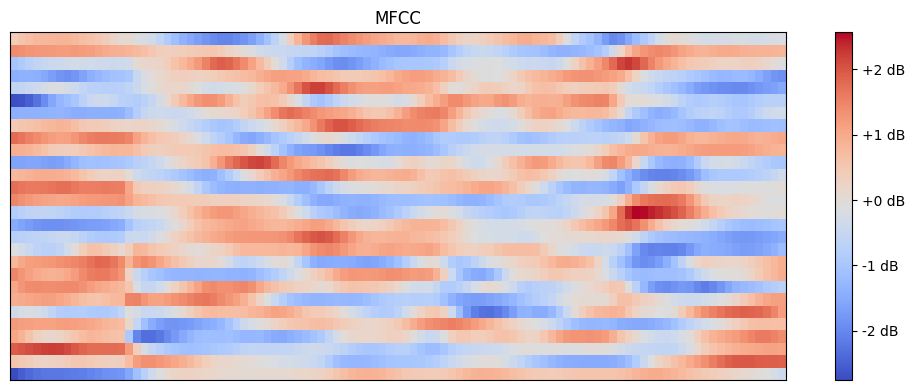

In [5]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(train_mfcc_list[0])
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [6]:
print(train_audio_dict['mfcc'].shape)
print(train_audio_dict['label'].shape)
print(test_audio_dict['mfcc'].shape)
print(test_audio_dict['label'].shape)

X_train = train_audio_dict['mfcc']
X_valid = test_audio_dict['mfcc']

y_train = train_audio_dict['label']
y_valid = test_audio_dict['label']


X_train = np.expand_dims(X_train, axis=-1)
X_valid = np.expand_dims(X_valid, axis=-1)
y_train = np.expand_dims(y_train, axis=-1)
y_valid = np.expand_dims(y_valid, axis=-1)


y_train = y_train.astype(np.float32)
y_valid = y_valid.astype(np.float32)

print()
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)


print(type(X_train[0][0][0]))
print(type(y_valid[0][0]))

(700, 28, 101)
(700,)
(300, 28, 101)
(300,)

(700, 28, 101, 1)
(300, 28, 101, 1)
(700, 1)
(300, 1)
<class 'numpy.ndarray'>
<class 'numpy.float32'>


In [7]:
X_train.shape[1:]

(28, 101, 1)

## 모델링

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Reshape, MaxPooling2D, Dropout, Conv2DTranspose, Activation, BatchNormalization, AveragePooling2D, Add, ZeroPadding2D
from keras import regularizers

def SnoringDetection():
    inputs = Input(shape = X_train.shape[1:], name = 'Input')
    x = ZeroPadding2D(((0, 0), (0, 1)))(inputs)
    x = Conv2D(filters = 4, kernel_size = 3, strides = (1, 2), padding = 'same')(x)
    
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters = 8, kernel_size = 3, strides = (1, 2), padding = 'same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = ZeroPadding2D(((0, 0), (0, 1)))(x)
    x = Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)    

    x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)    

    x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)    

    x = Conv2D(filters = 128, kernel_size = 3, strides = 2, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)    

    x = ZeroPadding2D(((0, 1), (0, 1)))(x)
    x = Conv2D(filters = 1, kernel_size = 3, strides = 2, padding = 'valid')(x)



    outputs = Flatten()(x)

    return Model(inputs, outputs, name = 'SnoringDetection')

In [9]:
model = SnoringDetection()
model.summary()

Model: "SnoringDetection"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 28, 101, 1)]      0         
                                                                 
 zero_padding2d (ZeroPaddin  (None, 28, 102, 1)        0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 28, 51, 4)         40        
                                                                 
 batch_normalization (Batch  (None, 28, 51, 4)         16        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 28, 51, 4)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 26, 8)    

2024-09-23 12:58:10.982716: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1051 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:3b:00.0, compute capability: 8.6
2024-09-23 12:58:10.983303: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22190 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:5e:00.0, compute capability: 8.6
2024-09-23 12:58:10.983775: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 22190 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:86:00.0, compute capability: 8.6
2024-09-23 12:58:10.984233: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 22190 MB memory:  -> device: 3, name: NVIDIA GeForce RTX 3090,

 chNormalization)                                                
                                                                 
 activation_5 (Activation)   (None, 2, 2, 128)         0         
                                                                 
 zero_padding2d_2 (ZeroPadd  (None, 3, 3, 128)         0         
 ing2D)                                                          
                                                                 
 conv2d_6 (Conv2D)           (None, 1, 1, 1)           1153      
                                                                 
 flatten (Flatten)           (None, 1)                 0         
                                                                 
Total params: 100657 (393.19 KB)
Trainable params: 100153 (391.22 KB)
Non-trainable params: 504 (1.97 KB)
_________________________________________________________________


In [10]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                  factor=0.65, # loss 얼만큼 줄일건지
                                                  mode='min',
                                                  patience=10, 
                                                  min_lr=1e-8,
                                                  cooldown=3)

model.compile(optimizer=optimizer, 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), # 출력값 그대로 나오게 설정
              metrics=['accuracy'])


In [11]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_valid, y_valid), shuffle=True, callbacks=[reduce_lr])

Epoch 1/100


2024-09-23 12:58:12.778961: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8902
2024-09-23 12:58:12.843297: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-09-23 12:58:13.029417: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-09-23 12:58:13.918072: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb0a91b3230 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-23 12:58:13.918106: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-09-23 12:58:13.918111: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-09-23 12:58:13.918115: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor de

44/44 [==============================] - 7s 35ms/step - loss: 0.6718 - accuracy: 0.5700 - val_loss: 0.6926 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
44/44 [==============================] - 1s 18ms/step - loss: 0.5373 - accuracy: 0.6929 - val_loss: 0.6904 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 3/100
44/44 [==============================] - 1s 18ms/step - loss: 0.4432 - accuracy: 0.7914 - val_loss: 0.6853 - val_accuracy: 0.4967 - lr: 1.0000e-04
Epoch 4/100
44/44 [==============================] - 1s 18ms/step - loss: 0.3714 - accuracy: 0.8614 - val_loss: 0.6791 - val_accuracy: 0.5333 - lr: 1.0000e-04
Epoch 5/100
44/44 [==============================] - 1s 18ms/step - loss: 0.3148 - accuracy: 0.9043 - val_loss: 0.6797 - val_accuracy: 0.5833 - lr: 1.0000e-04
Epoch 6/100
44/44 [==============================] - 1s 18ms/step - loss: 0.2611 - accuracy: 0.9229 - val_loss: 0.6820 - val_accuracy: 0.6133 - lr: 1.0000e-04
Epoch 7/100
44/44 [==============================] - 1s 18

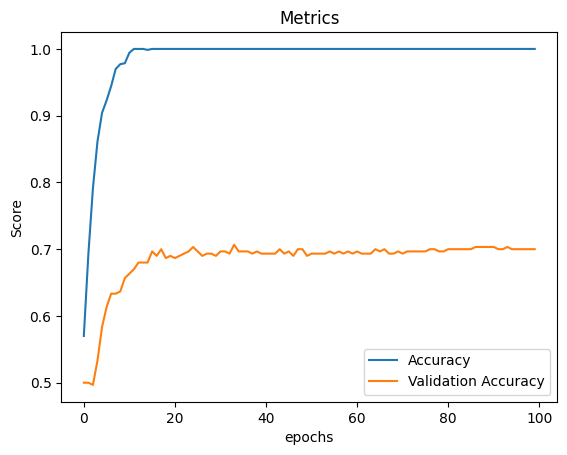

In [12]:
plt.figure()
plt.title('Metrics')
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Score')
plt.legend()
plt.show()

In [15]:
def add_activation(model:Model) -> Model:
	model.trainable = False                  # 필터 학습 X
	x = model.layers[-1].output              # flatten 부분 인터셉트
	# 각각의 슬롯의 확률을 구하기 위해 sigmoid 사용(softmax는 하나만 부각)
	x = Activation('sigmoid')(x)

	return Model(model.input, x)

model = add_activation(model)

In [21]:
# num = 160
num = 3

test_audio = X_valid[num]
print(y_valid[num])
test_audio = np.expand_dims(test_audio, axis = 0)
print(test_audio.shape)

pred = model.predict(test_audio)
print(pred)

[0.]
(1, 28, 101, 1)
1/1 [==============================] - 0s 23ms/step
[[0.08244803]]


: 